In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.dates as mdates
import sys
import os.path

sys.path.append('../../utils/')
from utils import *

"""
Dates: 
- 1/1/2004 - 1/1/2009
- 12/1/2008 - 1/1/2013
- 12/1/2012 - 1/1/2017
- 12/1/2016 - 3/1/2020
- 2/1/2020 - 5/31/2024

Overlap rows: 
- 2008-12-06, 2008-12-13, 2008-12-20, 2008-12-27
- 2012-12-06, 2012-12-13, 2012-12-20, 2012-12-27
- 2016-12-06, 2016-12-13, 2016-12-20, 2016-12-27
"""

"""
overlaps = {1: ['2008-12-06', '2008-12-13', '2008-12-20', '2008-12-27'],
           2: ['2012-12-01', '2012-12-08', '2012-12-15', '2012-12-22', '2012-12-29'],
           3: ['2016-12-03', '2016-12-10', '2016-12-17', '2016-12-24', '2016-12-31']}
"""

overlaps = {1: ['2008-11-29', '2008-12-06', '2008-12-13', '2008-12-20', '2008-12-27'], # 
           2: ['2012-11-24', '2012-12-01', '2012-12-08', '2012-12-15', '2012-12-22', '2012-12-29'], # 
           3: ['2016-11-26', '2016-12-03', '2016-12-10', '2016-12-17', '2016-12-24', '2016-12-31'], # 
           4: ['2020-01-25', '2020-02-01', '2020-02-08', '2020-02-15', '2020-02-22']} #, '2020-02-29'

In [3]:
def process_gtrends_csv(df,row_start=5):
    # Get rid of top metadata
    without_metadata = df.iloc[row_start:].copy().reset_index(drop=True)
    
    """
    without_metadata['Time'] = without_metadata.index 
    
    # Add in month
    months = []
    for time in without_metadata['Time']:
        months.append(time%12)
    without_metadata['Month'] = months
    """
    
    return without_metadata

In [31]:
dirname = '../../data/raw/gtrends/weekly-6-19-24/behavior/'

# ASSUMES ALL HAVE _4.csv

terms = []

filenames = os.listdir(dirname)
for fn in filenames:
    #print(locs[loc] + '/' + fn)
    if not os.path.isfile(dirname + fn):
        print('not a file: ', fn)
        continue
    if 'DS_Store' in fn:
        continue
    if not fn.endswith('_5.csv'):
        continue
    
    terms.append(fn.split('-')[0])
        
print(terms)
#terms[0] = 'plant-based'
terms


not a file:  old
['plant based recipe', 'plant based near me', 'vegan near me', 'plant based restaurants', 'plant based restaurants near me', 'vegetarian diet plan', 'vegetarian recipe', 'vegan recipe', 'vegetarian recipes', 'plant based restaurant', 'vegan recipes', 'plant based recipes', 'vegan restaurants near me', 'vegan restaurant', 'vegetarian restaurant', 'vegan restaurant near me', 'vegetarian restaurant near me', 'vegetarian near me', 'plant based diet plan', 'vegan diet plan', 'vegan restaurants', 'vegetarian restaurants near me', 'vegetarian restaurants']


['plant based recipe',
 'plant based near me',
 'vegan near me',
 'plant based restaurants',
 'plant based restaurants near me',
 'vegetarian diet plan',
 'vegetarian recipe',
 'vegan recipe',
 'vegetarian recipes',
 'plant based restaurant',
 'vegan recipes',
 'plant based recipes',
 'vegan restaurants near me',
 'vegan restaurant',
 'vegetarian restaurant',
 'vegan restaurant near me',
 'vegetarian restaurant near me',
 'vegetarian near me',
 'plant based diet plan',
 'vegan diet plan',
 'vegan restaurants',
 'vegetarian restaurants near me',
 'vegetarian restaurants']

../../data/raw/gtrends/weekly-6-19-24/behavior/plant based recipe-timeline_Glimpse_Google-Trends_
[4, 5]
o:  2020-01-25
o:  2020-02-01
o:  2020-02-08
o:  2020-02-15
o:  2020-02-22
5     2016-11-26
6     2016-12-03
7     2016-12-10
8     2016-12-17
9     2016-12-24
         ...    
227   2024-04-27
228   2024-05-04
229   2024-05-11
230   2024-05-18
231   2024-05-25
Name: T, Length: 392, dtype: datetime64[ns]


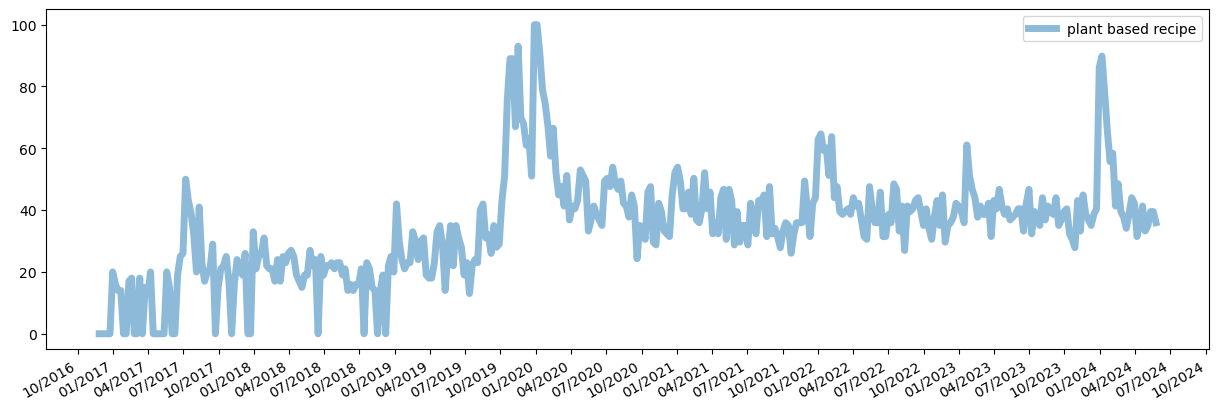

../../data/raw/gtrends/weekly-6-19-24/behavior/plant based near me-timeline_Glimpse_Google-Trends_
[4, 5]
o:  2020-01-25
o:  2020-02-01
o:  2020-02-08
o:  2020-02-15
o:  2020-02-22
5     2016-11-26
6     2016-12-03
7     2016-12-10
8     2016-12-17
9     2016-12-24
         ...    
227   2024-04-27
228   2024-05-04
229   2024-05-11
230   2024-05-18
231   2024-05-25
Name: T, Length: 392, dtype: datetime64[ns]


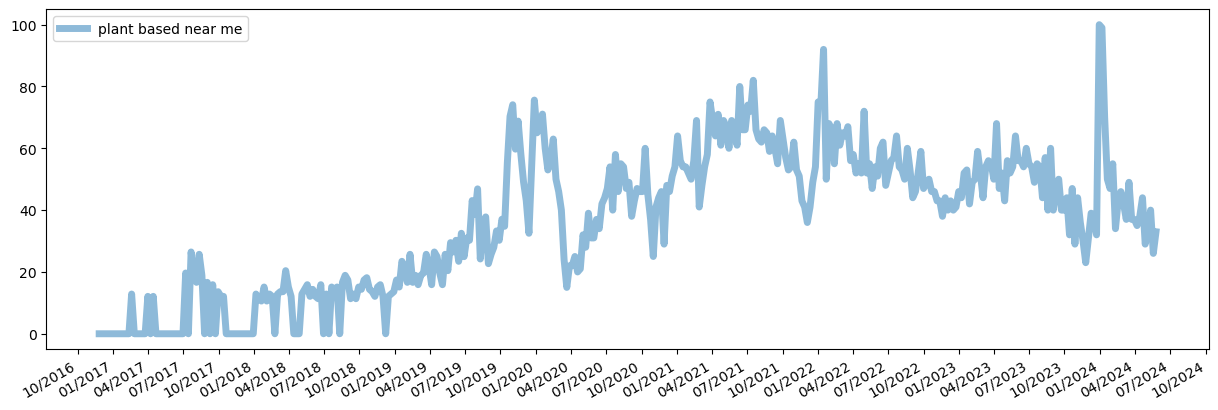

../../data/raw/gtrends/weekly-6-19-24/behavior/vegan near me-timeline_Glimpse_Google-Trends_
[3, 4, 5]
o:  2020-01-25
o:  2020-02-01
o:  2020-02-08
o:  2020-02-15
o:  2020-02-22
o:  2016-11-26
o:  2016-12-03
o:  2016-12-10
o:  2016-12-17
o:  2016-12-24
o:  2016-12-31
5     2012-11-24
6     2012-12-01
7     2012-12-08
8     2012-12-15
9     2012-12-22
         ...    
227   2024-04-27
228   2024-05-04
229   2024-05-11
230   2024-05-18
231   2024-05-25
Name: T, Length: 601, dtype: datetime64[ns]


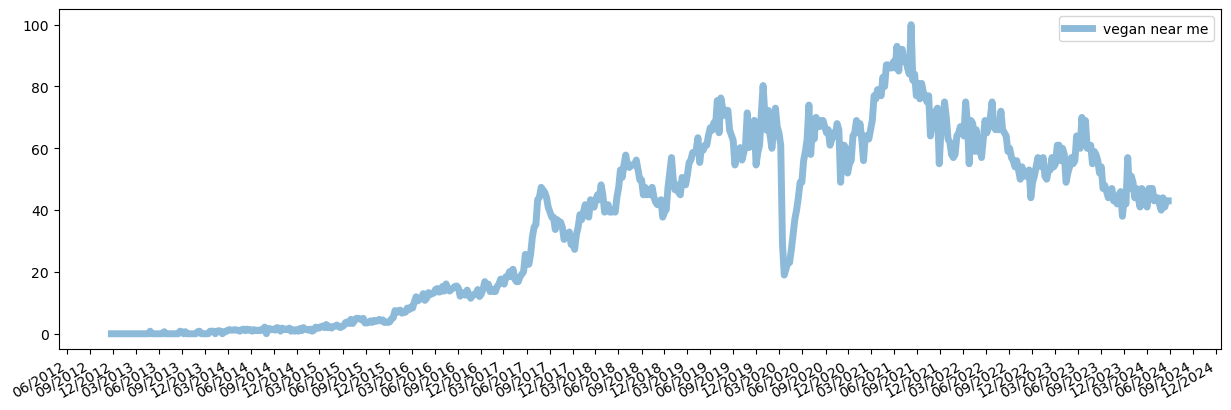

../../data/raw/gtrends/weekly-6-19-24/behavior/plant based restaurants-timeline_Glimpse_Google-Trends_
[4, 5]
o:  2020-01-25
o:  2020-02-01
o:  2020-02-08
o:  2020-02-15
o:  2020-02-22
5     2016-11-26
6     2016-12-03
7     2016-12-10
8     2016-12-17
9     2016-12-24
         ...    
227   2024-04-27
228   2024-05-04
229   2024-05-11
230   2024-05-18
231   2024-05-25
Name: T, Length: 392, dtype: datetime64[ns]


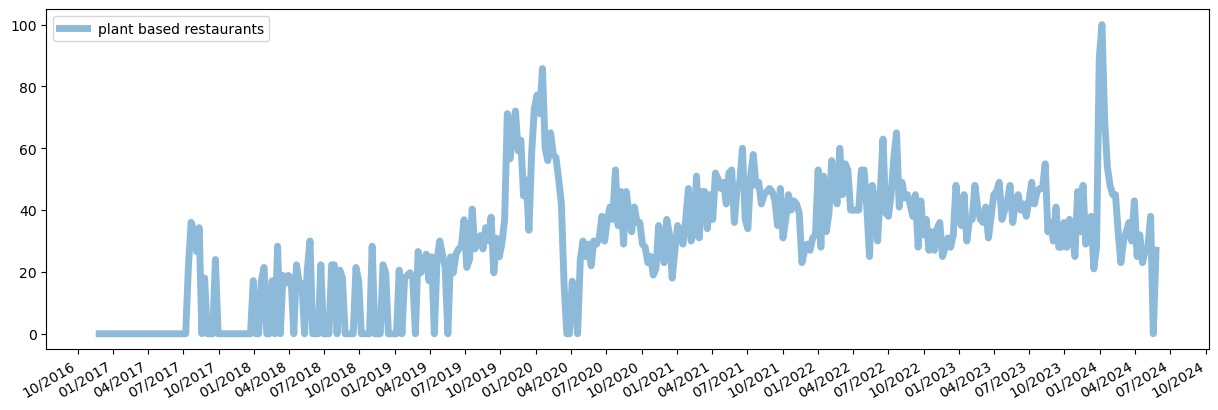

../../data/raw/gtrends/weekly-6-19-24/behavior/plant based restaurants near me-timeline_Glimpse_Google-Trends_
[4, 5]
o:  2020-01-25
o:  2020-02-01
o:  2020-02-08
o:  2020-02-15
o:  2020-02-22
5     2016-11-26
6     2016-12-03
7     2016-12-10
8     2016-12-17
9     2016-12-24
         ...    
227   2024-04-27
228   2024-05-04
229   2024-05-11
230   2024-05-18
231   2024-05-25
Name: T, Length: 392, dtype: datetime64[ns]


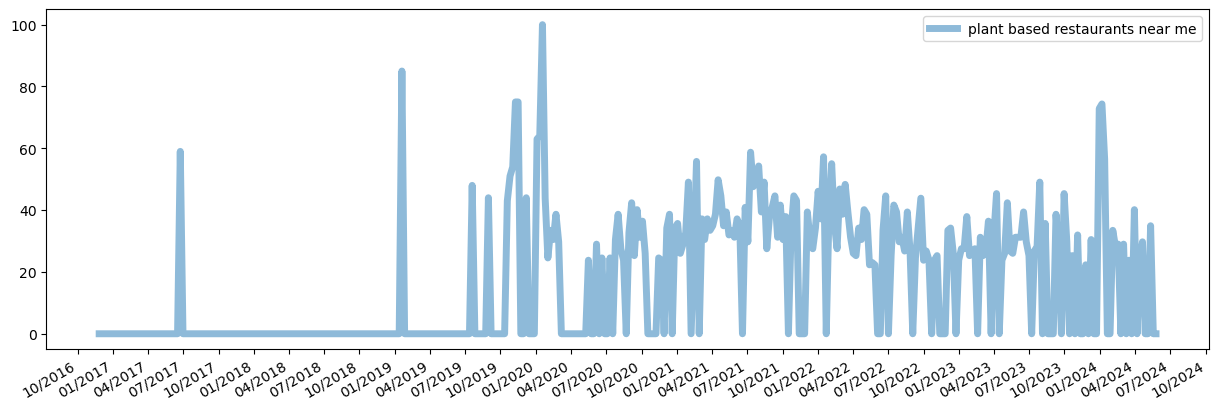

../../data/raw/gtrends/weekly-6-19-24/behavior/vegetarian diet plan-timeline_Glimpse_Google-Trends_
[1, 2, 3, 4, 5]
o:  2020-01-25
o:  2020-02-01
o:  2020-02-08
o:  2020-02-15
o:  2020-02-22
o:  2016-11-26
o:  2016-12-03
o:  2016-12-10
o:  2016-12-17
o:  2016-12-24
o:  2016-12-31
o:  2012-11-24
o:  2012-12-01
o:  2012-12-08
o:  2012-12-15
o:  2012-12-22
o:  2012-12-29
o:  2008-11-29
o:  2008-12-06
o:  2008-12-13
o:  2008-12-20
o:  2008-12-27
5     2003-12-27
6     2004-01-03
7     2004-01-10
8     2004-01-17
9     2004-01-24
         ...    
227   2024-04-27
228   2024-05-04
229   2024-05-11
230   2024-05-18
231   2024-05-25
Name: T, Length: 1066, dtype: datetime64[ns]


/Users/thomasat/opt/miniconda3/envs/nhanes/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars


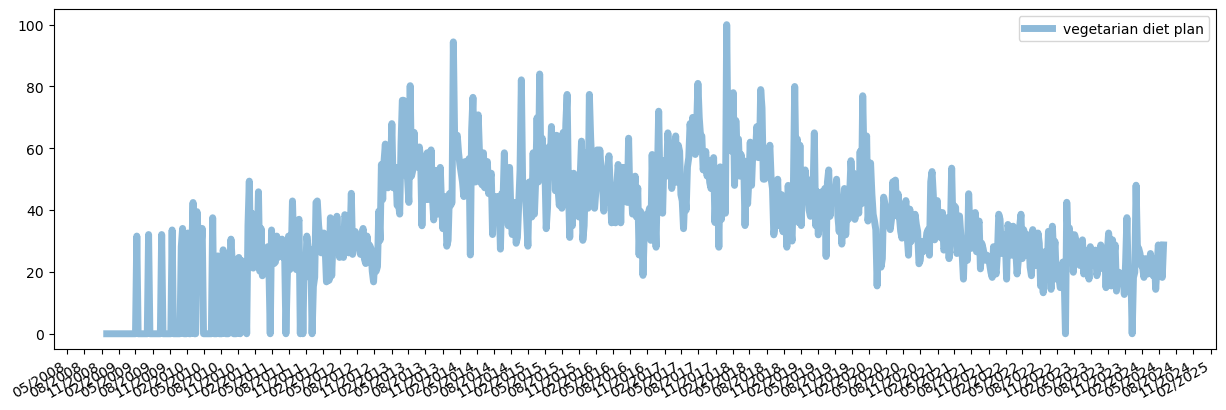

../../data/raw/gtrends/weekly-6-19-24/behavior/vegetarian recipe-timeline_Glimpse_Google-Trends_
[1, 2, 3, 4, 5]
o:  2020-01-25
o:  2020-02-01
o:  2020-02-08
o:  2020-02-15
o:  2020-02-22
o:  2016-11-26
o:  2016-12-03
o:  2016-12-10
o:  2016-12-17
o:  2016-12-24
o:  2016-12-31
o:  2012-11-24
o:  2012-12-01
o:  2012-12-08
o:  2012-12-15
o:  2012-12-22
o:  2012-12-29
o:  2008-11-29
o:  2008-12-06
o:  2008-12-13
o:  2008-12-20
o:  2008-12-27
5     2003-12-27
6     2004-01-03
7     2004-01-10
8     2004-01-17
9     2004-01-24
         ...    
227   2024-04-27
228   2024-05-04
229   2024-05-11
230   2024-05-18
231   2024-05-25
Name: T, Length: 1066, dtype: datetime64[ns]


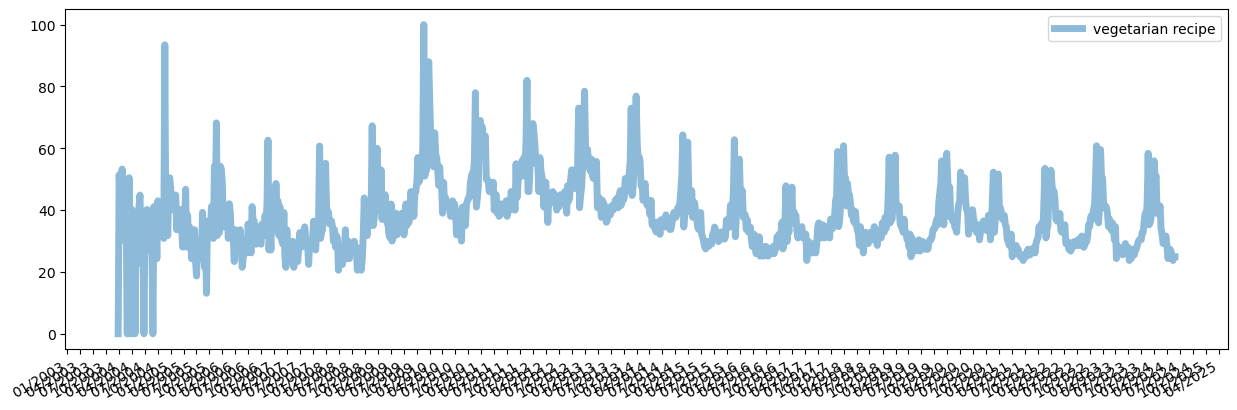

../../data/raw/gtrends/weekly-6-19-24/behavior/vegan recipe-timeline_Glimpse_Google-Trends_
[1, 2, 3, 4, 5]
o:  2020-01-25
o:  2020-02-01
o:  2020-02-08
o:  2020-02-15
o:  2020-02-22
o:  2016-11-26
o:  2016-12-03
o:  2016-12-10
o:  2016-12-17
o:  2016-12-24
o:  2016-12-31
o:  2012-11-24
o:  2012-12-01
o:  2012-12-08
o:  2012-12-15
o:  2012-12-22
o:  2012-12-29
o:  2008-11-29
o:  2008-12-06
o:  2008-12-13
o:  2008-12-20
o:  2008-12-27
5     2003-12-27
6     2004-01-03
7     2004-01-10
8     2004-01-17
9     2004-01-24
         ...    
227   2024-04-27
228   2024-05-04
229   2024-05-11
230   2024-05-18
231   2024-05-25
Name: T, Length: 1066, dtype: datetime64[ns]


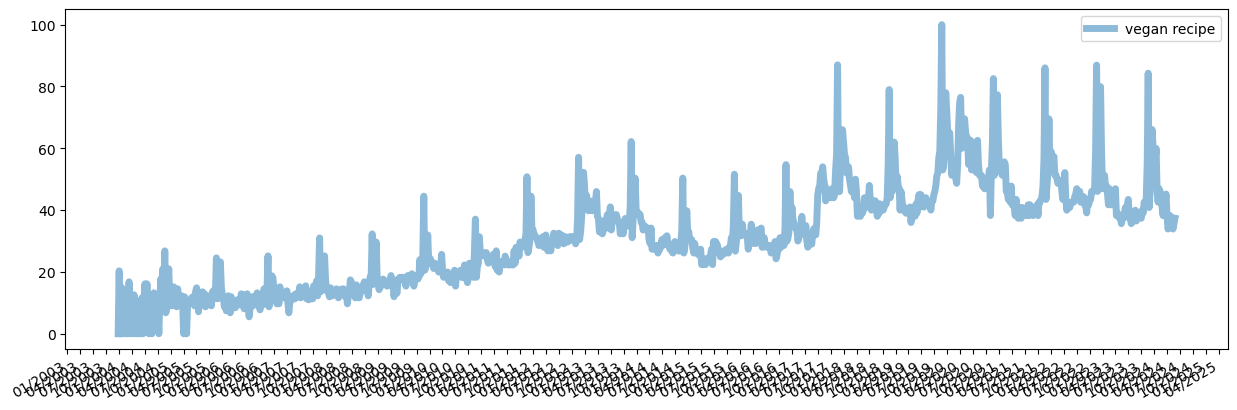

../../data/raw/gtrends/weekly-6-19-24/behavior/vegetarian recipes-timeline_Glimpse_Google-Trends_
[1, 2, 3, 4, 5]
o:  2020-01-25
o:  2020-02-01
o:  2020-02-08
o:  2020-02-15
o:  2020-02-22
o:  2016-11-26
o:  2016-12-03
o:  2016-12-10
o:  2016-12-17
o:  2016-12-24
o:  2016-12-31
o:  2012-11-24
o:  2012-12-01
o:  2012-12-08
o:  2012-12-15
o:  2012-12-22
o:  2012-12-29
o:  2008-11-29
o:  2008-12-06
o:  2008-12-13
o:  2008-12-20
o:  2008-12-27
5     2003-12-27
6     2004-01-03
7     2004-01-10
8     2004-01-17
9     2004-01-24
         ...    
227   2024-04-27
228   2024-05-04
229   2024-05-11
230   2024-05-18
231   2024-05-25
Name: T, Length: 1066, dtype: datetime64[ns]


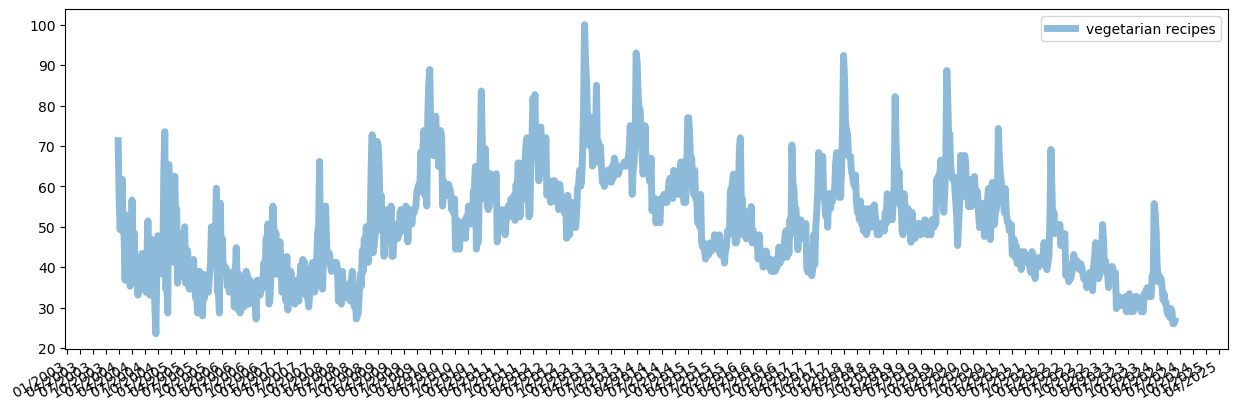

../../data/raw/gtrends/weekly-6-19-24/behavior/plant based restaurant-timeline_Glimpse_Google-Trends_
[4, 5]
o:  2020-01-25
o:  2020-02-01
o:  2020-02-08
o:  2020-02-15
o:  2020-02-22
5     2016-11-26
6     2016-12-03
7     2016-12-10
8     2016-12-17
9     2016-12-24
         ...    
227   2024-04-27
228   2024-05-04
229   2024-05-11
230   2024-05-18
231   2024-05-25
Name: T, Length: 392, dtype: datetime64[ns]


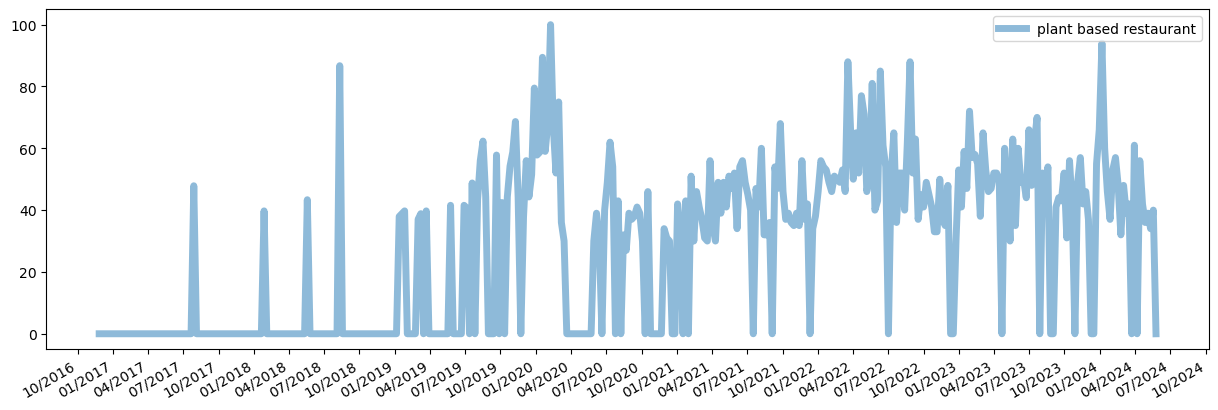

../../data/raw/gtrends/weekly-6-19-24/behavior/vegan recipes-timeline_Glimpse_Google-Trends_
[1, 2, 3, 4, 5]
o:  2020-01-25
o:  2020-02-01
o:  2020-02-08
o:  2020-02-15
o:  2020-02-22
o:  2016-11-26
o:  2016-12-03
o:  2016-12-10
o:  2016-12-17
o:  2016-12-24
o:  2016-12-31
o:  2012-11-24
o:  2012-12-01
o:  2012-12-08
o:  2012-12-15
o:  2012-12-22
o:  2012-12-29
o:  2008-11-29
o:  2008-12-06
o:  2008-12-13
o:  2008-12-20
o:  2008-12-27
5     2003-12-27
6     2004-01-03
7     2004-01-10
8     2004-01-17
9     2004-01-24
         ...    
227   2024-04-27
228   2024-05-04
229   2024-05-11
230   2024-05-18
231   2024-05-25
Name: T, Length: 1066, dtype: datetime64[ns]


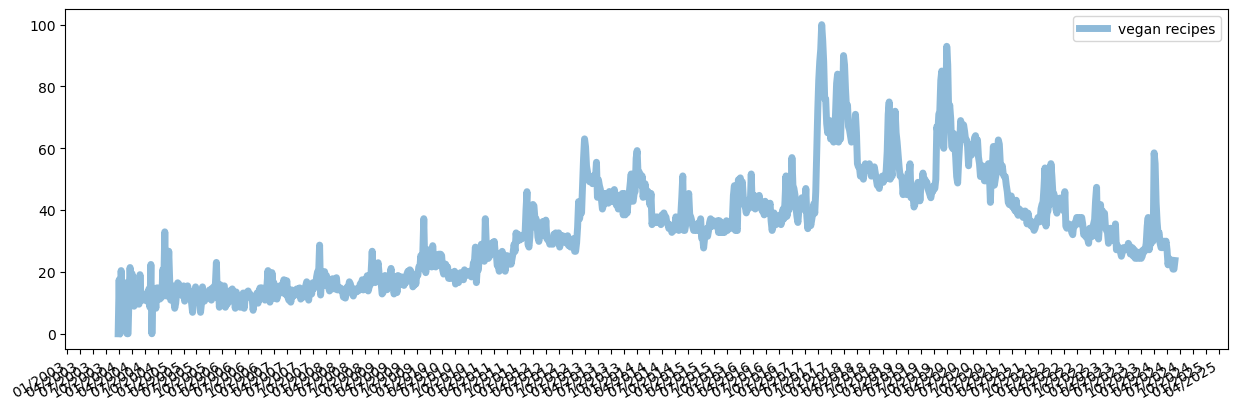

../../data/raw/gtrends/weekly-6-19-24/behavior/plant based recipes-timeline_Glimpse_Google-Trends_
[2, 3, 4, 5]
o:  2020-01-25
o:  2020-02-01
o:  2020-02-08
o:  2020-02-15
o:  2020-02-22
o:  2016-11-26
o:  2016-12-03
o:  2016-12-10
o:  2016-12-17
o:  2016-12-24
o:  2016-12-31
o:  2012-11-24
o:  2012-12-01
o:  2012-12-08
o:  2012-12-15
o:  2012-12-22
o:  2012-12-29
5     2008-11-29
6     2008-12-06
7     2008-12-13
8     2008-12-20
9     2008-12-27
         ...    
227   2024-04-27
228   2024-05-04
229   2024-05-11
230   2024-05-18
231   2024-05-25
Name: T, Length: 809, dtype: datetime64[ns]


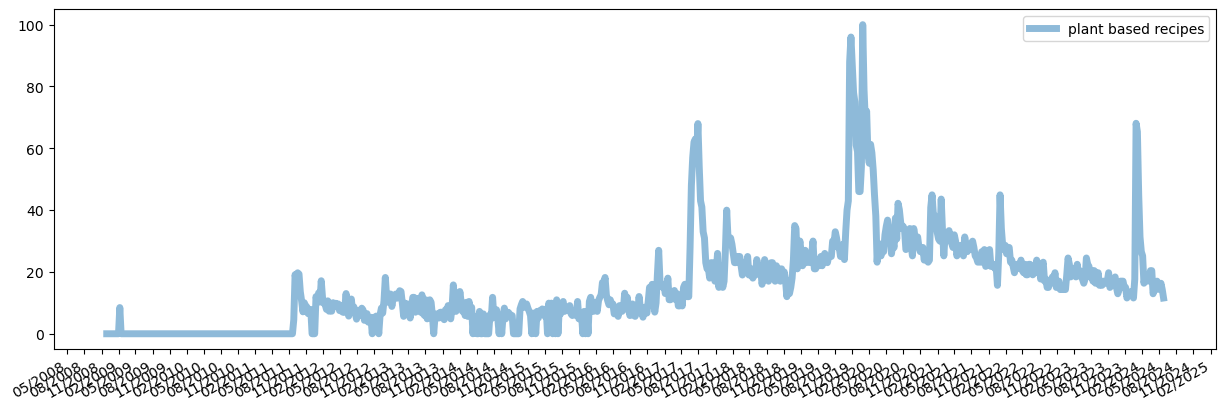

../../data/raw/gtrends/weekly-6-19-24/behavior/vegan restaurants near me-timeline_Glimpse_Google-Trends_
[3, 4, 5]
o:  2020-01-25
o:  2020-02-01
o:  2020-02-08
o:  2020-02-15
o:  2020-02-22
o:  2016-11-26
o:  2016-12-03
o:  2016-12-10
o:  2016-12-17
o:  2016-12-24
o:  2016-12-31
5     2012-11-24
6     2012-12-01
7     2012-12-08
8     2012-12-15
9     2012-12-22
         ...    
227   2024-04-27
228   2024-05-04
229   2024-05-11
230   2024-05-18
231   2024-05-25
Name: T, Length: 601, dtype: datetime64[ns]


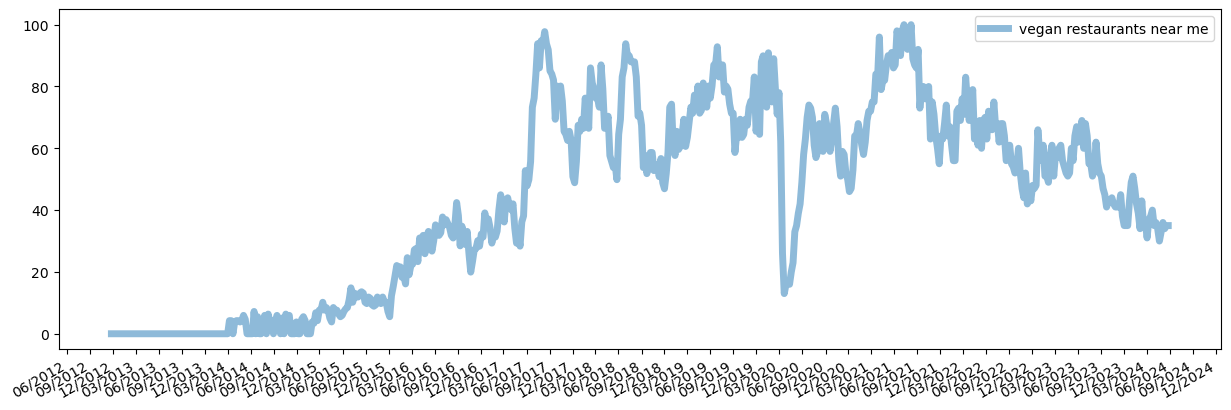

../../data/raw/gtrends/weekly-6-19-24/behavior/vegan restaurant-timeline_Glimpse_Google-Trends_
[1, 2, 3, 4, 5]
o:  2020-01-25
o:  2020-02-01
o:  2020-02-08
o:  2020-02-15
o:  2020-02-22
o:  2016-11-26
o:  2016-12-03
o:  2016-12-10
o:  2016-12-17
o:  2016-12-24
o:  2016-12-31
o:  2012-11-24
o:  2012-12-01
o:  2012-12-08
o:  2012-12-15
o:  2012-12-22
o:  2012-12-29
o:  2008-11-29
o:  2008-12-06
o:  2008-12-13
o:  2008-12-20
o:  2008-12-27
5     2003-12-27
6     2004-01-03
7     2004-01-10
8     2004-01-17
9     2004-01-24
         ...    
227   2024-04-27
228   2024-05-04
229   2024-05-11
230   2024-05-18
231   2024-05-25
Name: T, Length: 1066, dtype: datetime64[ns]


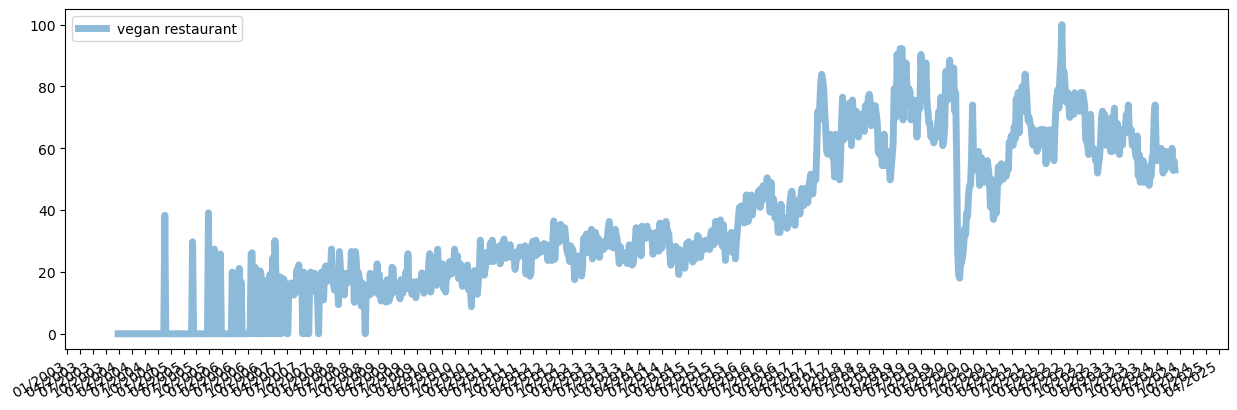

../../data/raw/gtrends/weekly-6-19-24/behavior/vegetarian restaurant-timeline_Glimpse_Google-Trends_
[1, 2, 3, 4, 5]
o:  2020-01-25
o:  2020-02-01
o:  2020-02-08
o:  2020-02-15
o:  2020-02-22
o:  2016-11-26
o:  2016-12-03
o:  2016-12-10
o:  2016-12-17
o:  2016-12-24
o:  2016-12-31
o:  2012-11-24
o:  2012-12-01
o:  2012-12-08
o:  2012-12-15
o:  2012-12-22
o:  2012-12-29
o:  2008-11-29
o:  2008-12-06
o:  2008-12-13
o:  2008-12-20
o:  2008-12-27
5     2003-12-27
6     2004-01-03
7     2004-01-10
8     2004-01-17
9     2004-01-24
         ...    
227   2024-04-27
228   2024-05-04
229   2024-05-11
230   2024-05-18
231   2024-05-25
Name: T, Length: 1066, dtype: datetime64[ns]


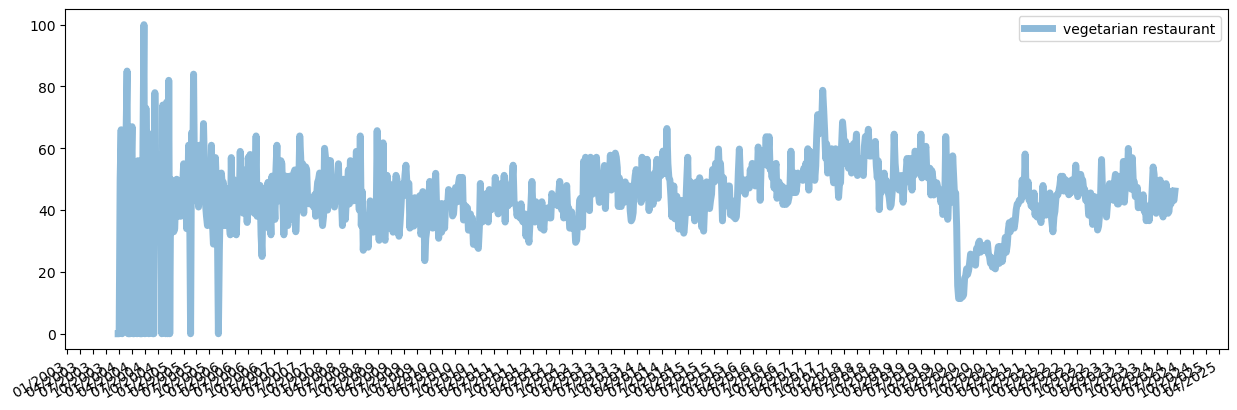

../../data/raw/gtrends/weekly-6-19-24/behavior/vegan restaurant near me-timeline_Glimpse_Google-Trends_
[3, 4, 5]
o:  2020-01-25
o:  2020-02-01
o:  2020-02-08
o:  2020-02-15
o:  2020-02-22
o:  2016-11-26
o:  2016-12-03
o:  2016-12-10
o:  2016-12-17
o:  2016-12-24
o:  2016-12-31
5     2012-11-24
6     2012-12-01
7     2012-12-08
8     2012-12-15
9     2012-12-22
         ...    
227   2024-04-27
228   2024-05-04
229   2024-05-11
230   2024-05-18
231   2024-05-25
Name: T, Length: 601, dtype: datetime64[ns]


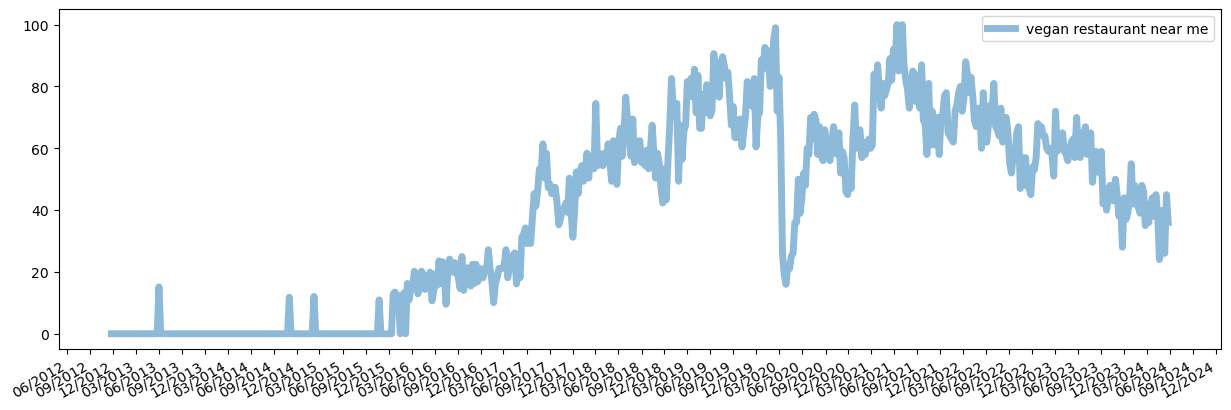

../../data/raw/gtrends/weekly-6-19-24/behavior/vegetarian restaurant near me-timeline_Glimpse_Google-Trends_
[3, 4, 5]
o:  2020-01-25
o:  2020-02-01
o:  2020-02-08
o:  2020-02-15
o:  2020-02-22
o:  2016-11-26
o:  2016-12-03
o:  2016-12-10
o:  2016-12-17
o:  2016-12-24
o:  2016-12-31
5     2012-11-24
6     2012-12-01
7     2012-12-08
8     2012-12-15
9     2012-12-22
         ...    
227   2024-04-27
228   2024-05-04
229   2024-05-11
230   2024-05-18
231   2024-05-25
Name: T, Length: 601, dtype: datetime64[ns]


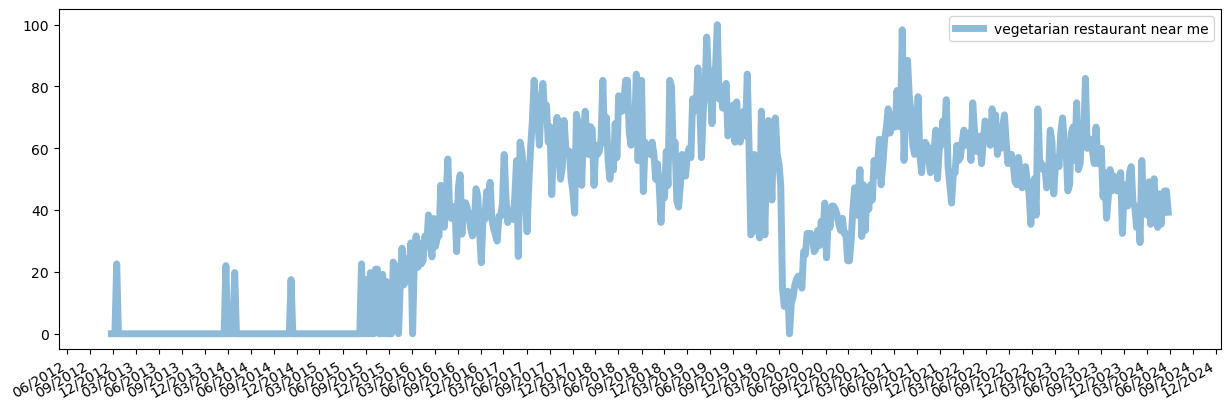

../../data/raw/gtrends/weekly-6-19-24/behavior/vegetarian near me-timeline_Glimpse_Google-Trends_
[3, 4, 5]
o:  2020-01-25
o:  2020-02-01
o:  2020-02-08
o:  2020-02-15
o:  2020-02-22
o:  2016-11-26
o:  2016-12-03
o:  2016-12-10
o:  2016-12-17
o:  2016-12-24
o:  2016-12-31
5     2012-11-24
6     2012-12-01
7     2012-12-08
8     2012-12-15
9     2012-12-22
         ...    
227   2024-04-27
228   2024-05-04
229   2024-05-11
230   2024-05-18
231   2024-05-25
Name: T, Length: 601, dtype: datetime64[ns]


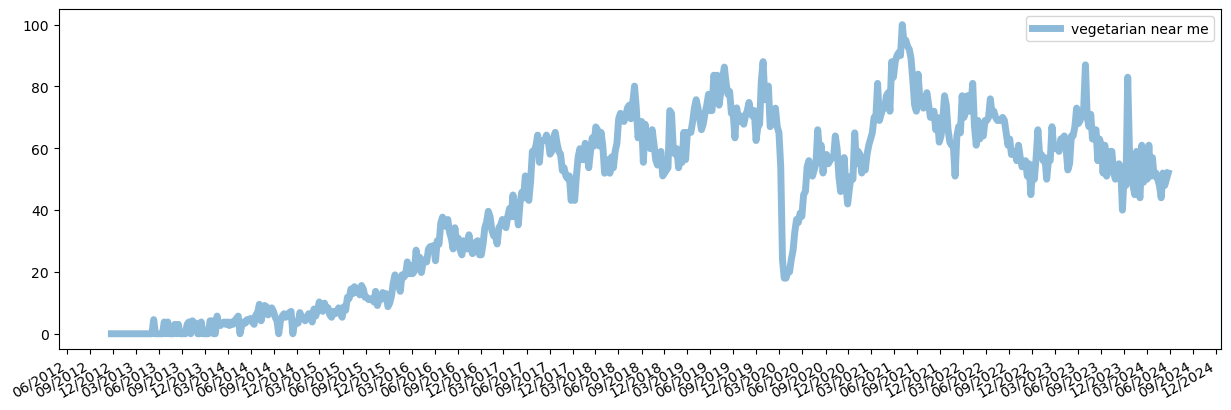

../../data/raw/gtrends/weekly-6-19-24/behavior/plant based diet plan-timeline_Glimpse_Google-Trends_
[3, 4, 5]
o:  2020-01-25
o:  2020-02-01
o:  2020-02-08
o:  2020-02-15
o:  2020-02-22
o:  2016-11-26
o:  2016-12-03
o:  2016-12-10
o:  2016-12-17
o:  2016-12-24
o:  2016-12-31
5     2012-11-24
6     2012-12-01
7     2012-12-08
8     2012-12-15
9     2012-12-22
         ...    
227   2024-04-27
228   2024-05-04
229   2024-05-11
230   2024-05-18
231   2024-05-25
Name: T, Length: 601, dtype: datetime64[ns]


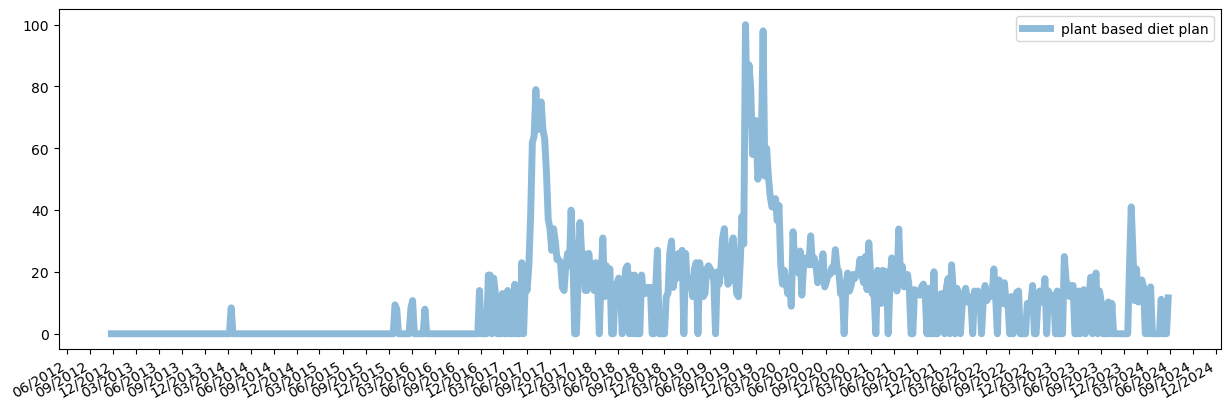

../../data/raw/gtrends/weekly-6-19-24/behavior/vegan diet plan-timeline_Glimpse_Google-Trends_
[2, 3, 4, 5]
o:  2020-01-25
o:  2020-02-01
o:  2020-02-08
o:  2020-02-15
o:  2020-02-22
o:  2016-11-26
o:  2016-12-03
o:  2016-12-10
o:  2016-12-17
o:  2016-12-24
o:  2016-12-31
o:  2012-11-24
o:  2012-12-01
o:  2012-12-08
o:  2012-12-15
o:  2012-12-22
o:  2012-12-29
5     2008-11-29
6     2008-12-06
7     2008-12-13
8     2008-12-20
9     2008-12-27
         ...    
227   2024-04-27
228   2024-05-04
229   2024-05-11
230   2024-05-18
231   2024-05-25
Name: T, Length: 809, dtype: datetime64[ns]


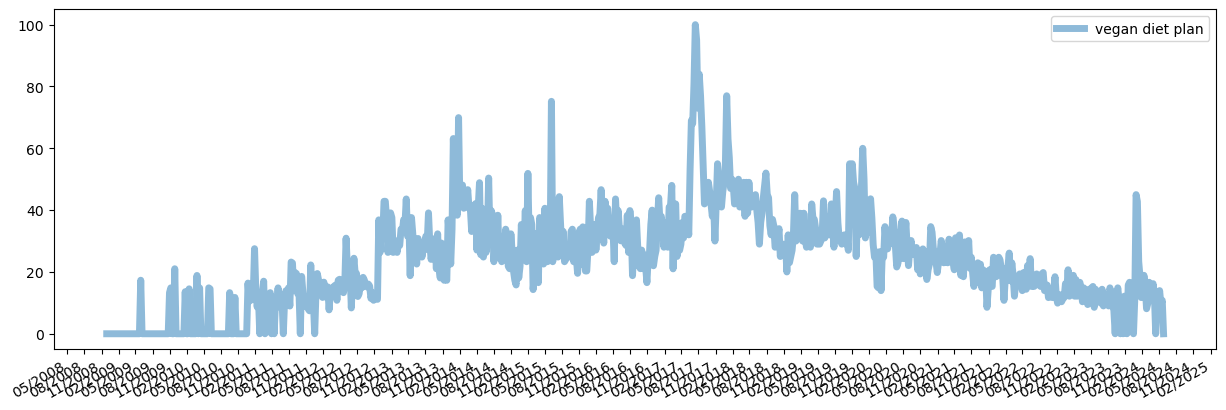

../../data/raw/gtrends/weekly-6-19-24/behavior/vegan restaurants-timeline_Glimpse_Google-Trends_
[1, 2, 3, 4, 5]
o:  2020-01-25
o:  2020-02-01
o:  2020-02-08
o:  2020-02-15
o:  2020-02-22
o:  2016-11-26
o:  2016-12-03
o:  2016-12-10
o:  2016-12-17
o:  2016-12-24
o:  2016-12-31
o:  2012-11-24
o:  2012-12-01
o:  2012-12-08
o:  2012-12-15
o:  2012-12-22
o:  2012-12-29
o:  2008-11-29
o:  2008-12-06
o:  2008-12-13
o:  2008-12-20
o:  2008-12-27
5     2003-12-27
6     2004-01-03
7     2004-01-10
8     2004-01-17
9     2004-01-24
         ...    
227   2024-04-27
228   2024-05-04
229   2024-05-11
230   2024-05-18
231   2024-05-25
Name: T, Length: 1066, dtype: datetime64[ns]


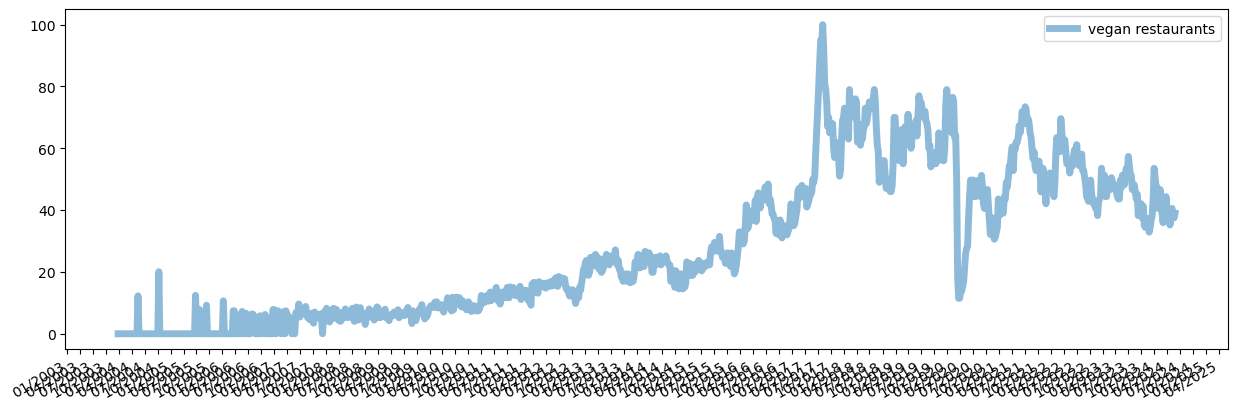

../../data/raw/gtrends/weekly-6-19-24/behavior/vegetarian restaurants near me-timeline_Glimpse_Google-Trends_
[3, 4, 5]
o:  2020-01-25
o:  2020-02-01
o:  2020-02-08
o:  2020-02-15
o:  2020-02-22
o:  2016-11-26
o:  2016-12-03
o:  2016-12-10
o:  2016-12-17
o:  2016-12-24
o:  2016-12-31
5     2012-11-24
6     2012-12-01
7     2012-12-08
8     2012-12-15
9     2012-12-22
         ...    
227   2024-04-27
228   2024-05-04
229   2024-05-11
230   2024-05-18
231   2024-05-25
Name: T, Length: 601, dtype: datetime64[ns]


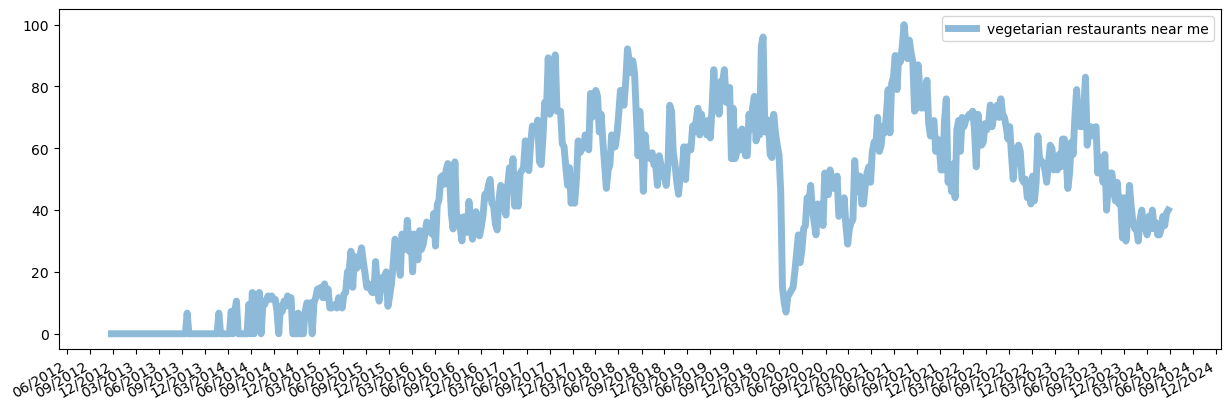

../../data/raw/gtrends/weekly-6-19-24/behavior/vegetarian restaurants-timeline_Glimpse_Google-Trends_
[1, 2, 3, 4, 5]
o:  2020-01-25
o:  2020-02-01
o:  2020-02-08
o:  2020-02-15
o:  2020-02-22
o:  2016-11-26
o:  2016-12-03
o:  2016-12-10
o:  2016-12-17
o:  2016-12-24
o:  2016-12-31
o:  2012-11-24
o:  2012-12-01
o:  2012-12-08
o:  2012-12-15
o:  2012-12-22
o:  2012-12-29
o:  2008-11-29
o:  2008-12-06
o:  2008-12-13
o:  2008-12-20
o:  2008-12-27
5     2003-12-27
6     2004-01-03
7     2004-01-10
8     2004-01-17
9     2004-01-24
         ...    
227   2024-04-27
228   2024-05-04
229   2024-05-11
230   2024-05-18
231   2024-05-25
Name: T, Length: 1066, dtype: datetime64[ns]


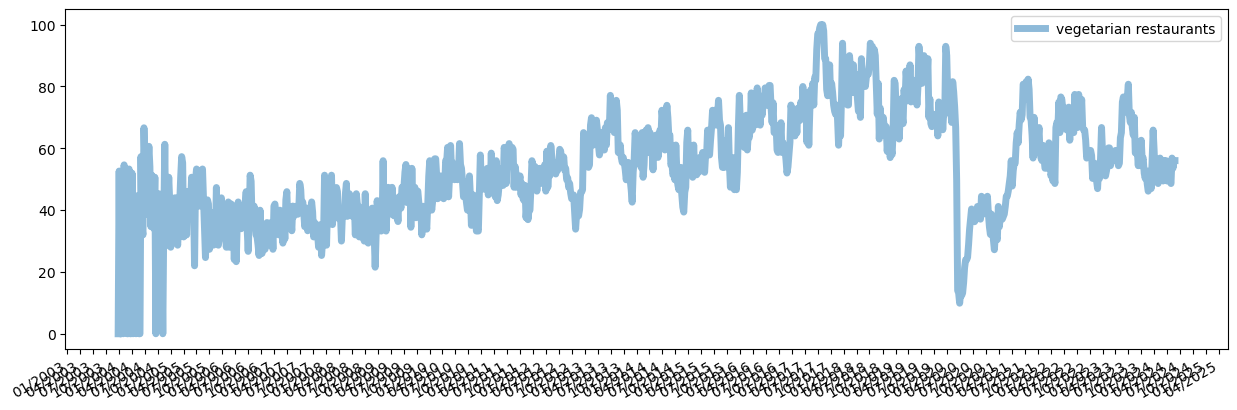

In [32]:
for term in terms:
    #print(term)
    weekly_prefix = dirname + '{term}-timeline_Glimpse_Google-Trends_'.format(term=term)

    #weekly_prefix = '../../data/gtrends/weekly-12-4-23/behavior/{term}-timeline_Glimpse_Google-Trends_'.format(term=term)
    #output_loc = '../../data/gtrends/weekly-12-4-23/behavior/{term}-timeline_Glimpse_Google-Trends.csv'.format(term=term)

    output_loc = dirname + '{term}-timeline_Glimpse_Google-Trends.csv'.format(term=term)

    dfs = {}

    possible_nums = [1,2,3,4,5]

    df_list = []

    #if term not in ['cowspiracy_ the sustainability secret', 'forks over knives']:
    #    assert df_list == [1,2,3,4]

    print(weekly_prefix)

    for i in possible_nums:
        if os.path.isfile(weekly_prefix + str(i) + '.csv'):
            df_list.append(i)

    print(df_list)

    for i in df_list:
        dfs[i] = pd.read_csv(weekly_prefix + str(i) + '.csv')
        dfs[i] = dfs[i].loc[~dfs[i]['Search Term'].isin(['Geography', 'Time Period', 'Type', 'Time', np.nan])]  
        
    col_name = term
    if term == 'cowspiracy_ the sustainability secret':
        col_name = 'cowspiracy: the sustainability secret'
    
    concat = scale_and_concatenate(dfs, overlaps, 'Search Term', col_name)
    
    plot_fig(concat.copy(), [col_name], date_col='Search Term')
    
    
    if concat['Search Term'].value_counts()[0] != 1:
        print(concat['Search Term'].value_counts())
        assert 0
    remove_col = 'Unnamed: 0'
    if remove_col in concat.columns:
        concat = concat.drop(remove_col, axis=1) 
    concat.reset_index(drop=True).to_csv(output_loc)

In [ ]:
"""
term = 'food'#'forks over knives'

weekly_prefix = '../../data/gtrends/weekly-12-4-23/confounds/bare/{term}-timeline_Glimpse_Google-Trends_'.format(term=term)

#weekly_prefix = '../../data/gtrends/weekly-12-4-23/behavior/{term}-timeline_Glimpse_Google-Trends_'.format(term=term)
#output_loc = '../../data/gtrends/weekly-12-4-23/behavior/{term}-timeline_Glimpse_Google-Trends.csv'.format(term=term)

output_loc = '../../data/gtrends/weekly-12-4-23/confounds/bare/{term}-timeline_Glimpse_Google-Trends.csv'.format(term=term)

dfs = {}

possible_nums = [1,2,3,4]

df_list = []

#if term not in ['cowspiracy_ the sustainability secret', 'forks over knives']:
#    assert df_list == [1,2,3,4]

print(weekly_prefix + str(1))

for i in possible_nums:
    if os.path.isfile(weekly_prefix + str(i) + '.csv'):
        df_list.append(i)

print(df_list)
        
for i in df_list:
    dfs[i] = pd.read_csv(weekly_prefix + str(i) + '.csv')
    dfs[i] = dfs[i].loc[~dfs[i]['Search Term'].isin(['Geography', 'Time Period', 'Type', 'Time', np.nan])]    

""" 
    

In [6]:
"""
Method: 
- Scale to the first one.
- Check against the monthly df, should be a constant ratio. 
- Scale to 100. 
"""

def get_ratios(df1, df2, overlaps, date_name, col_name):
    ratios = []
    # Switch to ratio of sum
    df1_vals = []
    df2_vals = []
    for o in overlaps:
        print('o: ', o)
        df1_val = int(df1.loc[df1[date_name] == o][col_name].item())
        df2_val = int(df2.loc[df2[date_name] == o][col_name].item())
        #print('df1_val, df2_val: ', df1_val, df2_val)
        #ratios.append(df1_val/df2_val)
        df1_vals.append(df1_val)
        df2_vals.append(df2_val)
    return np.mean(df1_vals)/np.mean(df2_vals)
        
def get_max(monthly_df, date_name, col_name):
    col_max = np.argmax(monthly_df[col_name])
    max_date = 0
    
def scale_and_concatenate(dfs, overlaps, date_name, col_name):
    assert 5 in dfs
    
    scaled_dfs = [dfs[5]]
    
    # Scale to 5. If 3 is small relative to 4, we scale up 3
    # Get ratios to 4
    if 4 in dfs:
        ratio45 = get_ratios(dfs[4], dfs[5], overlaps[4], date_name, col_name)
        scaled_df4 = dfs[4].copy()
        scaled_df4[col_name] = scaled_df4[col_name].astype(float)
        scaled_df4[col_name] *= (1.0/ratio45)
        scaled_dfs.insert(0, scaled_df4.iloc[:-len(overlaps[4]), :])
    if 3 in dfs:
        ratio34 = get_ratios(dfs[3], dfs[4], overlaps[3], date_name, col_name)
        scaled_df3 = dfs[3].copy()
        scaled_df3[col_name] = scaled_df3[col_name].astype(float)
        scaled_df3[col_name] *= (1.0/ratio34)*(1.0/ratio45)
        scaled_dfs.insert(0, scaled_df3.iloc[:-len(overlaps[3]), :])
    if 2 in dfs:
        ratio23 = get_ratios(dfs[2], dfs[3], overlaps[2], date_name, col_name)
        scaled_df2 = dfs[2].copy()
        scaled_df2[col_name] = scaled_df2[col_name].astype(float)
        scaled_df2[col_name] *= (1.0/ratio23)*(1.0/ratio34)
        scaled_dfs.insert(0, scaled_df2.iloc[:-len(overlaps[2]), :])
    if 1 in dfs:
        ratio12 = get_ratios(dfs[1], dfs[2], overlaps[1], date_name, col_name)
        scaled_df1 = dfs[1].copy()
        scaled_df1[col_name] = scaled_df1[col_name].astype(float)
        scaled_df1[col_name] *= (1.0/ratio12)*(1.0/ratio23)*(1.0/ratio34)
        scaled_dfs.insert(0, scaled_df1.iloc[:-len(overlaps[1]), :])
    
    #print('ratio12, ratio23, ratio34: ', ratio12, ratio23, ratio34)
    
    # Scale to the last one, which will definitely exist
    
    """
    scaled_df2[col_name] *= (ratio12)
    scaled_df3[col_name] *= (ratio23)*(ratio12)
    scaled_df4[col_name] *= (ratio34)*(ratio23)*(ratio12)
    """
    
    concat = pd.concat(scaled_dfs, axis=0)
    
    # Concatenate. For overlaps, use the first one.
    #concate = pd.concat([dfs[1], scaled_df2, scaled_df3, scaled_df4], axis=0)
    """
    concate = pd.concat([dfs[1], scaled_df2.iloc[len(overlaps[1]):, :]], axis=0)
    concate = pd.concat([concate, scaled_df3.iloc[len(overlaps[2]):, :]], axis=0)
    concate = pd.concat([concate, scaled_df4.iloc[len(overlaps[3]):, :]], axis=0)
    """
    
    concat[col_name] = concat[col_name].astype(float)
    
    # Scale to 100
    concat[col_name] /= (concat[col_name].max())
    concat[col_name] *= 100
    
    return concat

    
def scale_and_concatenate_old(dfs, overlaps, date_name, col_name):
    assert 4 in dfs
    
    scaled_dfs = [dfs[4]]
    
    # Scale to 4. If 3 is small relative to 4, we scale up 3
    # Get ratios to 4
    if 3 in dfs:
        ratio34 = get_ratios(dfs[3], dfs[4], overlaps[3], date_name, col_name)
        scaled_df3 = dfs[3].copy()
        scaled_df3[col_name] = scaled_df3[col_name].astype(float)
        scaled_df3[col_name] *= (1.0/ratio34)
        scaled_dfs.insert(0, scaled_df3.iloc[:-len(overlaps[3]), :])
    if 2 in dfs:
        ratio23 = get_ratios(dfs[2], dfs[3], overlaps[2], date_name, col_name)
        scaled_df2 = dfs[2].copy()
        scaled_df2[col_name] = scaled_df2[col_name].astype(float)
        scaled_df2[col_name] *= (1.0/ratio23)*(1.0/ratio34)
        scaled_dfs.insert(0, scaled_df2.iloc[:-len(overlaps[2]), :])
    if 1 in dfs:
        ratio12 = get_ratios(dfs[1], dfs[2], overlaps[1], date_name, col_name)
        scaled_df1 = dfs[1].copy()
        scaled_df1[col_name] = scaled_df1[col_name].astype(float)
        scaled_df1[col_name] *= (1.0/ratio12)*(1.0/ratio23)*(1.0/ratio34)
        scaled_dfs.insert(0, scaled_df1.iloc[:-len(overlaps[1]), :])
    
    #print('ratio12, ratio23, ratio34: ', ratio12, ratio23, ratio34)
    
    # Scale to the last one, which will definitely exist
    
    """
    scaled_df2[col_name] *= (ratio12)
    scaled_df3[col_name] *= (ratio23)*(ratio12)
    scaled_df4[col_name] *= (ratio34)*(ratio23)*(ratio12)
    """
    
    concat = pd.concat(scaled_dfs, axis=0)
    
    # Concatenate. For overlaps, use the first one.
    #concate = pd.concat([dfs[1], scaled_df2, scaled_df3, scaled_df4], axis=0)
    """
    concate = pd.concat([dfs[1], scaled_df2.iloc[len(overlaps[1]):, :]], axis=0)
    concate = pd.concat([concate, scaled_df3.iloc[len(overlaps[2]):, :]], axis=0)
    concate = pd.concat([concate, scaled_df4.iloc[len(overlaps[3]):, :]], axis=0)
    """
    
    concat[col_name] = concat[col_name].astype(float)
    
    # Scale to 100
    concat[col_name] /= (concat[col_name].max())
    concat[col_name] *= 100
    
    return concat

In [ ]:
#dfs[4]

In [ ]:
#concat = scale_and_concatenate(dfs, overlaps, 'Search Term', term)

In [ ]:
#monthly_df['vegan recipes'] = monthly_df['vegan recipes'].astype(int)

In [ ]:
#plt.plot(range(concat.shape[0]), concat[term])

In [ ]:
#plot_fig(concat.copy(), [term], date_col='Search Term')

In [ ]:
#concat.loc[concat['animal welfare'] == concat['animal welfare'].min()]

In [ ]:
"""
assert concat['Search Term'].value_counts()[0] == 1
remove_col = 'Unnamed: 0'
if remove_col in concat.columns:
    concat = concat.drop(remove_col, axis=1) 
concat.reset_index(drop=True).to_csv(output_loc)
"""